In [70]:
import trimesh

# 加载3D模型
mesh = trimesh.load_mesh('./smpl.obj')

# 网格稀疏化
mesh_simplified = mesh.simplify_quadratic_decimation(1000)  # 1000是目标面数

# 保存稀疏化后的模型
mesh_simplified.export('./smpl_simplified.obj')

/tmp/ipykernel_2237731/164425334.py:7: DeprecationWarning: `simplify_quadratic_decimation` is deprecated as it was a typo and will be removed in March 2024: replace with `simplify_quadric_decimation`
  mesh_simplified = mesh.simplify_quadratic_decimation(1000)  # 1000是目标面数


'# https://github.com/mikedh/trimesh\nv 0.38788387 0.47392643 0.70422952\nv 0.39654604 0.47109169 0.68092324\nv 0.37228441 0.49182544 0.69273737\nv 0.32661696 0.40904400 0.64440431\nv 0.36840878 0.45735242 0.60222005\nv 0.47442838 0.45039103 0.74426308\nv 0.39000235 0.32222625 0.71855608\nv 0.37135661 0.48558760 0.71951036\nv 0.39086918 0.48434685 0.73035925\nv 0.34507378 0.36396912 0.64281742\nv 0.33090670 0.46346072 0.69524759\nv 0.35501085 0.45273017 0.66238201\nv 0.36626207 0.34422493 0.59372830\nv 0.49010682 0.37186167 0.76185840\nv 0.46902450 0.34236951 0.73544752\nv 0.41081403 0.44879877 0.61015375\nv 0.33705150 0.48080269 0.74919856\nv 0.38995913 0.47593153 0.80816209\nv 0.44766154 0.39956119 0.60444108\nv 0.43260392 0.42237084 0.59192373\nv 0.49553171 0.41683530 0.69752035\nv 0.52189171 0.40197378 0.70807946\nv 0.47992631 0.41721391 0.73466676\nv 0.36841042 0.30833373 0.70708446\nv 0.40384486 0.45491696 0.55501666\nv 0.39549051 0.33113504 0.68132651\nv 0.45295446 0.46716368 0.

In [3]:
from pysdf import SDF
import trimesh
o = trimesh.load('./smpl.obj')

In [6]:
f = SDF(o.vertices, o.faces)

# Compute some SDF values (negative outside);
# takes a (num_points, 3) array, converts automatically
origin_sdf = f([0, 0, 0])
sdf_multi_point = f([[0, 0, 0],[1,1,1],[0.1,0.2,0.2]])
print ("origin_sdf: ", origin_sdf)

origin_sdf:  [0.10010266]


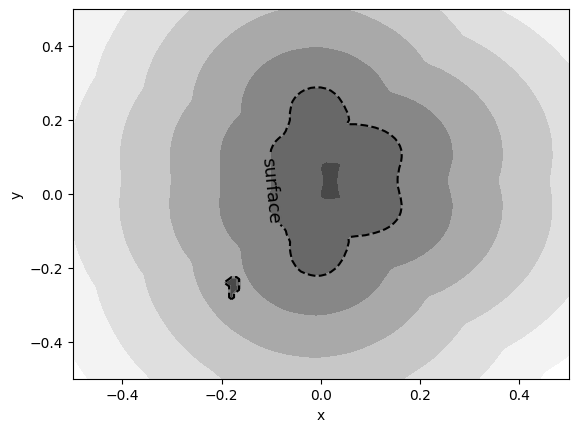

(tensor([0.5234, 0.5191, 0.5146,  ..., 0.4758, 0.4827, 0.4896]),
 tensor([[-0.8570, -0.3072,  0.4138],
         [-0.8615, -0.4548,  0.2257],
         [-0.8694, -0.4402,  0.2244],
         ...,
         [ 0.7302,  0.6816,  0.0483],
         [ 0.7235,  0.6887,  0.0471],
         [ 0.7182,  0.6939,  0.0510]]),
 tensor([[-0.5000, -0.5000,  0.0000],
         [-0.5000, -0.4900,  0.0000],
         [-0.5000, -0.4800,  0.0000],
         ...,
         [ 0.5000,  0.4800,  0.0000],
         [ 0.5000,  0.4900,  0.0000],
         [ 0.5000,  0.5000,  0.0000]]),
 <Axes: xlabel='x', ylabel='y'>,
 <matplotlib.contour.QuadContourSet at 0x7fa2de538610>)

In [2]:
import pytorch_volumetric as pv
import numpy as np

# supposing we have an object mesh (most formats supported) - from https://github.com/eleramp/pybullet-object-models
obj = pv.MeshObjectFactory("./smpl.obj")
sdf = pv.MeshSDF(obj)
# need a dimension with no range to slice; here it's y
query_range = np.array([
[-0.5, 0.5],
[-0.5, 0.5],
[0.0, 0.0],
   #[-0.2, -0.16],
   #[-0.3, -0.22],
   #[0.0, 0.0],
])
pv.draw_sdf_slice(sdf, query_range)

In [1]:
import trimesh, skimage
from mesh_to_sdf import mesh_to_sdf, mesh_to_voxels, sample_sdf_near_surface

# 加载3D网格
mesh = trimesh.load('./smpl.obj')

if False:
    points, sdf = sample_sdf_near_surface(mesh, number_of_points=250000)

    colors = np.zeros(points.shape)
    colors[sdf < 0, 2] = 1
    colors[sdf > 0, 0] = 1
    cloud = pyrender.Mesh.from_points(points, colors=colors)
    scene = pyrender.Scene()
    scene.add(cloud)
    viewer = pyrender.Viewer(scene, use_raymond_lighting=True, point_size=2)

In [2]:
from mesh_to_sdf import sample_sdf_near_surface

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

points, sdf = sample_sdf_near_surface(mesh, number_of_points=250000)

In [3]:
import pyrender
import numpy as np
colors = np.zeros(points.shape)
colors[sdf < 0, 2] = 1
colors[sdf > 0, 0] = 1
cloud = pyrender.Mesh.from_points(points, colors=colors)
scene = pyrender.Scene()
scene.add(cloud)
viewer = pyrender.Viewer(scene, use_raymond_lighting=True, point_size=2)

NameError: name 'np' is not defined